## Импорт библиотек и распределений

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import laplace, norm

## Генерация выборки случайной величины, подчиняющейся распределению Лапласа
$$x \text{ ~ } Lapl(\lambda, \beta)$$
$$f(x)=\frac{\lambda}{2}e^{-\lambda|x-\beta|}$$

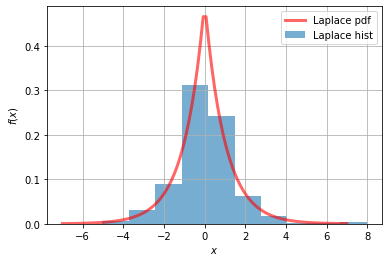

In [154]:
lap_rv = laplace.rvs(size = 1000)
fig, ax = plt.subplots(1, 1)
x = np.linspace(-7, 7, 100)
ax.plot(x, laplace.pdf(x),'r-', lw=3, alpha=0.6, label='Laplace pdf')
ax.hist(lap_rv, density=True, alpha=0.6, label='Laplace hist')
ax.legend()
ax.set_ylabel('$f(x)$')
ax.set_xlabel('$x$')
ax.grid()

## Построение гистограмм выборочных средних 1000 выборок объема 3, 5, 10, 50. Сравнение гистограмм и соответствующих функций плотности распределения Гаусса с параметрами ($\beta,\ \frac{2}{\lambda^2n}$).

Text(0, 0.5, '$f(x)$')

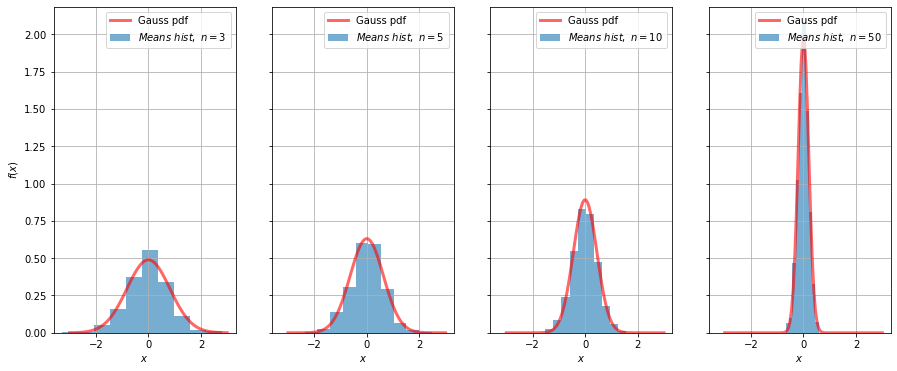

In [168]:
fig1, ax1 = plt.subplots(1, 4, True, True, figsize = (15,6))
means = []
c = 0
x1 = np.linspace(-3, 3, 100)
for n in [3, 5, 10, 50]:
    means.append([])
    for i in range(1000):
        means[c].append(np.mean(laplace.rvs(size = n)))
    norm_rv = sts.norm(loc = 0, scale = np.sqrt(2/n)) # в нашем распределении параметр бета равен 0,
                                                      # а лямбда 1, поэтому параметры гауссовского распределения равны 0 и 2/n
    ax1[c].plot(x1, norm_rv.pdf(x1),'r-', lw = 3, alpha=0.6, label='Gauss pdf')
    ax1[c].hist(means[c], density=True, alpha=0.6, label='$Means\ hist,\ n=%d$' % n)
    ax1[c].legend()
    ax1[c].set_xlabel('$x$')
    ax1[c].grid()
    c += 1
ax1[0].set_ylabel('$f(x)$')

При увеличении объема выборок прослеживается уменьшение дисперсии выборочных средних, что соответствует теории, точность аппроксимации гистограммы распределения выборочных средних кривой плотности распределения Гаусса увеличивается с увеличением объема выборок.